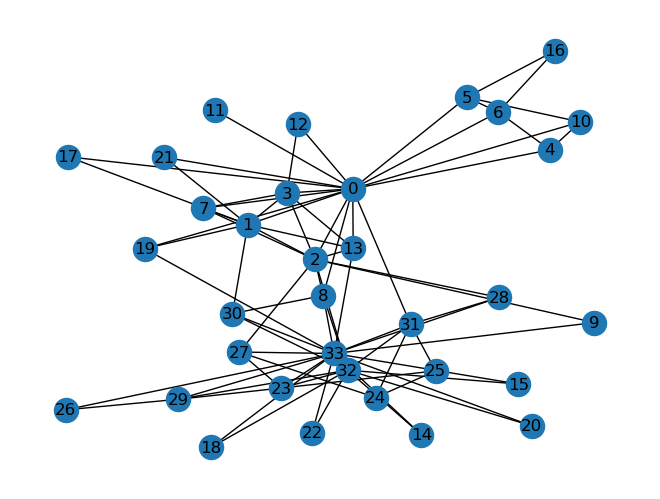

In [1]:
import networkx as nx

G = nx.karate_club_graph()

nx.draw(G, with_labels = True)

## Q1. Average Degree

- 가라테 동아리의 연결성(Degree)

In [2]:
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()

In [3]:
sum(list(dict(G.degree).values())) / num_nodes

4.588235294117647

In [4]:
G.degree

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [5]:
def average_degree(num_edges, num_nodes):
    # TODO: Implement this function that takes number of edges
    # and number of nodes, and returns the average node degree of 
    # the graph. Round the result to nearest integer (for example 
    # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

    avg_degree = 0

    ############# Your code here ############
    avg_degree = round(2*num_edges/num_nodes)
    #########################################

    return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


## Q2. Average clustering Coefficient


In [6]:
print(nx.clustering(G))

{0: 0.15, 1: 0.3333333333333333, 2: 0.24444444444444444, 3: 0.6666666666666666, 4: 0.6666666666666666, 5: 0.5, 6: 0.5, 7: 1.0, 8: 0.5, 9: 0, 10: 0.6666666666666666, 11: 0, 12: 1.0, 13: 0.6, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 0.3333333333333333, 20: 1.0, 21: 1.0, 22: 1.0, 23: 0.4, 24: 0.3333333333333333, 25: 0.3333333333333333, 26: 1.0, 27: 0.16666666666666666, 28: 0.3333333333333333, 29: 0.6666666666666666, 30: 0.5, 31: 0.2, 32: 0.19696969696969696, 33: 0.11029411764705882}


In [7]:
def average_clustering_coefficient(G):
    # TODO: Implement this function that takes a nx.Graph
    # and returns the average clustering coefficient. Round 
    # the result to 2 decimal places (for example 3.333 will
    # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

    avg_cluster_coef = 0

    ############# Your code here ############
    ## Note: 
    ## 1: Please use the appropriate NetworkX clustering function
    avg_cluster_coef = sum(list(nx.clustering(G).values())) / G.number_of_nodes()
    avg_cluster_coef = round(avg_cluster_coef, 2)
    #########################################
    
    return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


## Q3. pagerank

- Please complete the code block by implementing the PageRank equation: $r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$
    - ${d_i}$: out-degree of node i

In [8]:
list(G.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [9]:
G.degree(0)

16

In [10]:
def one_iter_pagerank(G, beta, r0, node_id):
    # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
    # The return value r1 is one interation PageRank value for the input node.
    # Please round r1 to 2 decimal places.

    r1 = 0

    ############# Your code here ############
    ## Note: 
    ## 1: You should not use nx.pagerank
    r1 = (beta * r0 / G.degree(node_id)) + ((1-beta) / G.number_of_nodes())
    r1 = round(r1, 2)
    #########################################

    return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.01


In [11]:
(beta * r0 / G.degree(4)) + ((1-beta) / G.number_of_nodes())

0.013725490196078431

## Q4. closeness centrality

- closeness centrality: $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [12]:
nx.shortest_path(G, 5, 1)

[5, 0, 1]

In [13]:
nx.shortest_path_length(G, 5, 5)

0

In [14]:
nx.closeness_centrality(G)[5] / (G.number_of_nodes() -1)

0.011627906976744186

In [15]:
print(nx.closeness_centrality(G))

{0: 0.5689655172413793, 1: 0.4852941176470588, 2: 0.559322033898305, 3: 0.4647887323943662, 4: 0.3793103448275862, 5: 0.38372093023255816, 6: 0.38372093023255816, 7: 0.44, 8: 0.515625, 9: 0.4342105263157895, 10: 0.3793103448275862, 11: 0.36666666666666664, 12: 0.3707865168539326, 13: 0.515625, 14: 0.3707865168539326, 15: 0.3707865168539326, 16: 0.28448275862068967, 17: 0.375, 18: 0.3707865168539326, 19: 0.5, 20: 0.3707865168539326, 21: 0.375, 22: 0.3707865168539326, 23: 0.39285714285714285, 24: 0.375, 25: 0.375, 26: 0.3626373626373626, 27: 0.4583333333333333, 28: 0.4520547945205479, 29: 0.38372093023255816, 30: 0.4583333333333333, 31: 0.5409836065573771, 32: 0.515625, 33: 0.55}


In [16]:
def closeness_centrality(G, node=5):
    # TODO: Implement the function that calculates closeness centrality 
    # for a node in karate club network. G is the input karate club 
    # network and node is the node id in the graph. Please round the 
    # closeness centrality result to 2 decimal places.

    closeness = 0

    ## Note:
    ## 1: You can use networkx closeness centrality function.
    ## 2: Notice that networkx closeness centrality returns the normalized 
    ## closeness directly, which is different from the raw (unnormalized) 
    ## one that we learned in the lecture.
    dist = 0
    for dst_node in G.nodes:
        if dst_node != node:
            dist += nx.shortest_path_length(G, node, dst_node)
    closeness = 1/dist
    print(closeness)
    closeness = round(closeness, 2)
    #########################################

    return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The karate club network has closeness centrality {}".format(closeness))

0.011627906976744186
The karate club network has closeness centrality 0.01


## Q5. Getting the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor?

In [17]:
import torch
print(torch.__version__)

1.11.0


In [18]:
def graph_to_edge_list(G):
    # TODO: Implement the function that returns the edge list of
    # an nx.Graph. The returned edge_list should be a list of tuples
    # where each tuple is a tuple representing an edge connected 
    # by two nodes.

    edge_list = []

    ############# Your code here ############
    edge_list = list(G.edges)
    #########################################

    return edge_list

def edge_list_to_tensor(edge_list):
    # TODO: Implement the function that transforms the edge_list to
    # tensor. The input edge_list is a list of tuples and the resulting
    # tensor should have the shape [2 x len(edge_list)].

    edge_index = torch.tensor([])

    ############# Your code here ############
    edge_index = torch.tensor(edge_list).T
    #########################################

    return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


## Q6: Please implement following function that samples negative edges. Then you will answer which edges (edge_1 to edge_5) can be negative ones in the karate club network?

In [19]:
import random

def sample_negative_edges(G, num_neg_samples):
    # TODO: Implement the function that returns a list of negative edges.
    # The number of sampled negative edges is num_neg_samples. You do not
    # need to consider the corner case when the number of possible negative edges
    # is less than num_neg_samples. It should be ok as long as your implementation 
    # works on the karate club network. In this implementation, self loop should 
    # not be considered as either a positive or negative edge. Also, notice that 
    # the karate club network is an undirected graph, if (0, 1) is a positive 
    # edge, do you think (1, 0) can be a negative one?

    neg_edge_list = []

    ############# Your code here ############
    pos_edges = G.edges
    for i in range(num_neg_samples):
        candidate = sorted(random.sample(list(G.nodes), k=2))
        if candidate not in pos_edges:
            neg_edge_list.append(candidate)
    #########################################

    return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge
for i, edge in enumerate([edge_1, edge_2, edge_3, edge_4, edge_5]):
    cur_edge = sorted(edge)
    if edge[0] == edge[1]:
        print(f"edge_{i+1} is self loop")
    if cur_edge in G.edges:
        print(f"edge_{i+1} is positive")
    else:
        print(f"edge_{i+1} is negative")
#########################################

The neg_edge_index tensor has shape torch.Size([2, 66])
edge_1 is positive
edge_2 is negative
edge_3 is positive
edge_4 is positive
edge_5 is negative


In [20]:
len(neg_edge_index[0])

66

## Q7. Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope.

In [21]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.11.0


In [22]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))


Sample embedding layer: Embedding(4, 8)
tensor([[-0.1903,  0.5609,  1.8432, -0.9368, -0.0035,  0.7824,  0.1055,  0.6158]],
       grad_fn=<EmbeddingBackward0>)
tensor([[-0.1903,  0.5609,  1.8432, -0.9368, -0.0035,  0.7824,  0.1055,  0.6158],
        [ 0.7339,  0.3470,  1.0391,  1.4863,  0.6497,  1.4895,  0.9197, -0.2972]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [23]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
    # TODO: Implement this function that will create the node embedding matrix.
    # A torch.nn.Embedding layer will be returned. You do not need to change 
    # the values of num_node and embedding_dim. The weight matrix of returned 
    # layer should be initialized under uniform distribution. 

    emb = None

    ############# Your code here ############
    # ref https://stackoverflow.com/questions/55276504/different-methods-for-initializing-embedding-layer-weights-in-pytorch
    emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
    emb.weight.data.uniform_(0,1)
    # nn.init.uniform_(emb.weight, 0, 1)

    #########################################

    return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then visualize each point, colored by the community it belongs to.

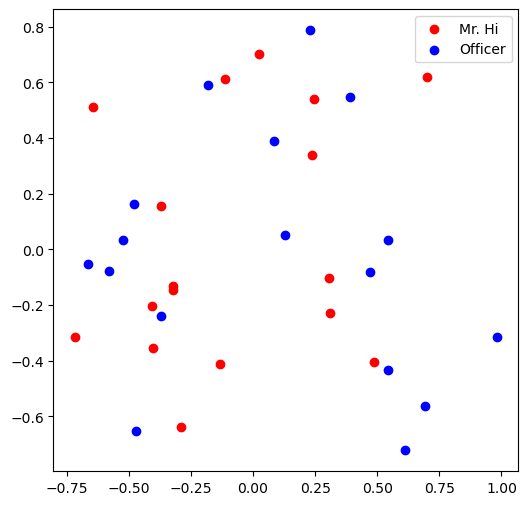

In [24]:
def visualize_emb(emb):
    X = emb.weight.data.numpy()
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(6, 6))
    club1_x = []
    club1_y = []
    club2_x = []
    club2_y = []
    for node in G.nodes(data=True):
        if node[1]['club'] == 'Mr. Hi':
            club1_x.append(components[node[0]][0])
            club1_y.append(components[node[0]][1])
        else:
            club2_x.append(components[node[0]][0])
            club2_y.append(components[node[0]][1])
    plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
    plt.scatter(club2_x, club2_y, color="blue", label="Officer")
    plt.legend()
    plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

In [25]:
emb

Embedding(34, 16)

## Q7: Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope.

In [26]:
from torch.optim import SGD

def accuracy(pred, label):
    # TODO: Implement the accuracy function. This function takes the 
    # pred tensor (the resulting tensor after sigmoid) and the label 
    # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
    # be classified as label 1. Else it will be classified as label 0.
    # The returned accuracy should be rounded to 4 decimal places. 
    # For example, accuracy 0.82956 will be rounded to 0.8296.

    accu = 0.0

    ############# Your code here ############
    tp_tn = torch.sum(label == (pred > 0.5))
    accu = tp_tn / len(label)
    accu = round(float(accu), 4)
    #########################################

    return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
    # TODO: Train the embedding layer here. You can also change epochs and 
    # learning rate. In general, you need to implement: 
    # (1) Get the embeddings of the nodes in train_edge
    # (2) Dot product the embeddings between each node pair
    # (3) Feed the dot product result into sigmoid
    # (4) Feed the sigmoid output into the loss_fn
    # (5) Print both loss and accuracy of each epoch 
    # (as a sanity check, the loss should decrease during training)

    epochs = 500
    learning_rate = 0.1

    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

    for i in range(epochs):
        ############# Your code here ############
        optimizer.zero_grad()
        out = emb(train_edge)
        dot_out = torch.sum((out[0] * out[1]), axis=1)
        y_pred_prob = sigmoid(dot_out)
        loss = loss_fn(y_pred_prob, train_label)
        loss.backward()
        optimizer.step()
        print(f"epcoch: {i+1}: ", end='\t')
        print(f"acc: {accuracy(y_pred_prob, train_label)}")
        
        #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

train(emb, loss_fn, sigmoid, train_label, train_edge)

epcoch: 1: 	acc: 0.5417
epcoch: 2: 	acc: 0.5417
epcoch: 3: 	acc: 0.5417
epcoch: 4: 	acc: 0.5417
epcoch: 5: 	acc: 0.5417
epcoch: 6: 	acc: 0.5417
epcoch: 7: 	acc: 0.5417
epcoch: 8: 	acc: 0.5417
epcoch: 9: 	acc: 0.5417
epcoch: 10: 	acc: 0.5417
epcoch: 11: 	acc: 0.5417
epcoch: 12: 	acc: 0.5417
epcoch: 13: 	acc: 0.5417
epcoch: 14: 	acc: 0.5417
epcoch: 15: 	acc: 0.5417
epcoch: 16: 	acc: 0.5417
epcoch: 17: 	acc: 0.5417
epcoch: 18: 	acc: 0.5417
epcoch: 19: 	acc: 0.5417
epcoch: 20: 	acc: 0.5417
epcoch: 21: 	acc: 0.5417
epcoch: 22: 	acc: 0.5417
epcoch: 23: 	acc: 0.5556
epcoch: 24: 	acc: 0.5556
epcoch: 25: 	acc: 0.5556
epcoch: 26: 	acc: 0.5625
epcoch: 27: 	acc: 0.5625
epcoch: 28: 	acc: 0.5625
epcoch: 29: 	acc: 0.5625
epcoch: 30: 	acc: 0.5833
epcoch: 31: 	acc: 0.6181
epcoch: 32: 	acc: 0.625
epcoch: 33: 	acc: 0.6319
epcoch: 34: 	acc: 0.6458
epcoch: 35: 	acc: 0.6667
epcoch: 36: 	acc: 0.6736
epcoch: 37: 	acc: 0.6944
epcoch: 38: 	acc: 0.7153
epcoch: 39: 	acc: 0.7153
epcoch: 40: 	acc: 0.7569
epcoch: 41

epcoch: 394: 	acc: 1.0
epcoch: 395: 	acc: 1.0
epcoch: 396: 	acc: 1.0
epcoch: 397: 	acc: 1.0
epcoch: 398: 	acc: 1.0
epcoch: 399: 	acc: 1.0
epcoch: 400: 	acc: 1.0
epcoch: 401: 	acc: 1.0
epcoch: 402: 	acc: 1.0
epcoch: 403: 	acc: 1.0
epcoch: 404: 	acc: 1.0
epcoch: 405: 	acc: 1.0
epcoch: 406: 	acc: 1.0
epcoch: 407: 	acc: 1.0
epcoch: 408: 	acc: 1.0
epcoch: 409: 	acc: 1.0
epcoch: 410: 	acc: 1.0
epcoch: 411: 	acc: 1.0
epcoch: 412: 	acc: 1.0
epcoch: 413: 	acc: 1.0
epcoch: 414: 	acc: 1.0
epcoch: 415: 	acc: 1.0
epcoch: 416: 	acc: 1.0
epcoch: 417: 	acc: 1.0
epcoch: 418: 	acc: 1.0
epcoch: 419: 	acc: 1.0
epcoch: 420: 	acc: 1.0
epcoch: 421: 	acc: 1.0
epcoch: 422: 	acc: 1.0
epcoch: 423: 	acc: 1.0
epcoch: 424: 	acc: 1.0
epcoch: 425: 	acc: 1.0
epcoch: 426: 	acc: 1.0
epcoch: 427: 	acc: 1.0
epcoch: 428: 	acc: 1.0
epcoch: 429: 	acc: 1.0
epcoch: 430: 	acc: 1.0
epcoch: 431: 	acc: 1.0
epcoch: 432: 	acc: 1.0
epcoch: 433: 	acc: 1.0
epcoch: 434: 	acc: 1.0
epcoch: 435: 	acc: 1.0
epcoch: 436: 	acc: 1.0
epcoch: 437

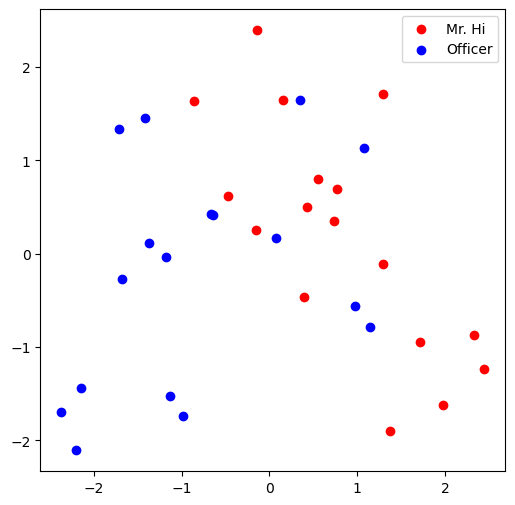

In [27]:
# Visualize the final learned embedding
visualize_emb(emb)

## References
--- 
- http://snap.stanford.edu/class/cs224w-2020/index.html#content
- https://colab.research.google.com/drive/1b9rZIjD7MUEKwYbXZc3dchTBTpzdrvpd?usp=sharing

